<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleE_3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Continuity and Differentiation

**3.2.1 Limits and Continuity**

A limit is an important concept in calculus and analysis. It plays a large role in explaining continuity of functions, derivatives, and integrals.

For a function to be continuous, it cannot have any sudden changes in values at a specific point. Sudden value changes are called discontinuities.

**Example**  Use the limit function in Python to determine the limit of f(x) = 1/x^2 + 1, as x approaches infinity.

In [ ]:
from sympy import limit, oo, Symbol
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
x = Symbol('x')
y = 1/x**2 + 1
lim1 = limit(y,x,oo)
lim2 = limit(y,x,0)
print("Limit approaching zero: ", lim2)
print("Limit approaching +infinity: ", lim1)

Limit approaching zero:  oo
Limit approaching +infinity:  1


**Example** Plot the function, f(x) = 1/x^2 + 1, to show discontinuity at 0.

Text(0.5, 1.0, 'Continuity')

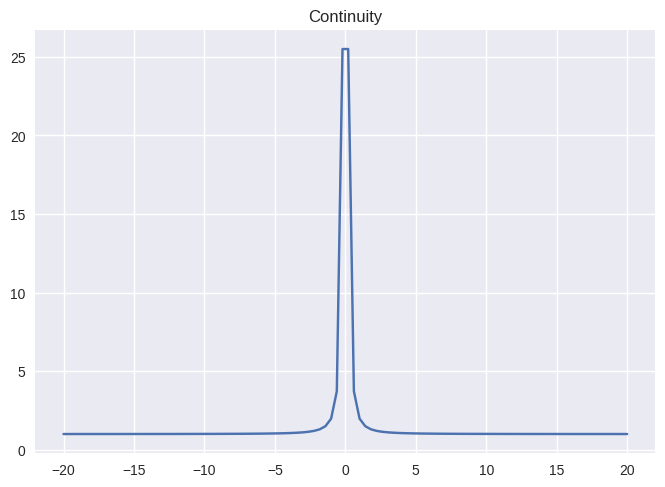

In [ ]:
import numpy as np
x = np.linspace(-20,20,100)
y = 1/x**2 + 1

import matplotlib.pyplot as plt
plt.figure
plt.plot(x, y)
plt.title('Continuity')

**3.2.2 Derivatives**

Another analysis method that uses limits is derivatives. The derivative of a function shows how the output changes in relation to other variables.

Derivative of a given function, f(x):
f'(x0) = df(x0)/dx = lim(h-->0) (f(x0 + h) - f(x0))/h

**Example**  Use the differentiation function in Python to determine the linear derivative of x^3 + 2x^2 + x + 1.

In [ ]:
from sympy import symbols, diff
x = symbols('x')
y = x**3 + 2*x**2 + x + 1
y_prime = diff(y, x)
y_prime

3*x**2 + 4*x + 1

The following are different methods of taking a derivative of a function.

Mean Value Theorem: States that a function, f(x), within bounds of [a, b] that is a continuous function, and assuming the derivative exists on (a, b). Then there is a value, c, where a<c<b such that f(b) = f(a)+(b-a)f'(c). Or f'(c) = (f(b) - f(a))/(b-a).

Rolle Theorem: States that a function, f, within bounds [a, b] that is a continuous function, and assuming the derivative exists on (a, b) and if f(a) = f(b). Then there is a value, c, where a<c<b such that f'(c) = 0.

Partial derivatives are used when you have more than one variable represented in a function. We take the derivative with respect to one variable while keep the remaining variables constant.

**Example**  Use the differentiation function in Python to take the derivative of x, y, and z in the function f = 15xyz + x*sin(z) + x^2 + yz^8.

In [ ]:
from sympy import symbols, diff
from sympy import symbols, sin

x, y, z = symbols('x y z', real=True)
f = 15*x*y*z + x*sin(z) + x**2 + y*z**8
partial_x = diff(f, x)
partial_y = diff(f, y)
partial_z = diff(f, z)

print("Partial derivative with respect to x: ", partial_x)
print("Partial derivative with respect to y: ", partial_y)
print("Partial derivative with respect to z: ", partial_z)

Partial derivative with respect to x:  2*x + 15*y*z + sin(z)
Partial derivative with respect to y:  15*x*z + z**8
Partial derivative with respect to z:  15*x*y + x*cos(z) + 8*y*z**7


Taylor Series is a generalization of the Mean Value Theorem but gives an approximation around a specific point of a polynomial. By using the infinite nature of the Taylor Series we can increase the order of differentiation to gain better approximations of a function.

**Example**  Use Python to plot the sin function along with the first, third, fifth, and seventh order Taylor Series approximations.

<ipython-input-7-421ab2e968c3>:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)


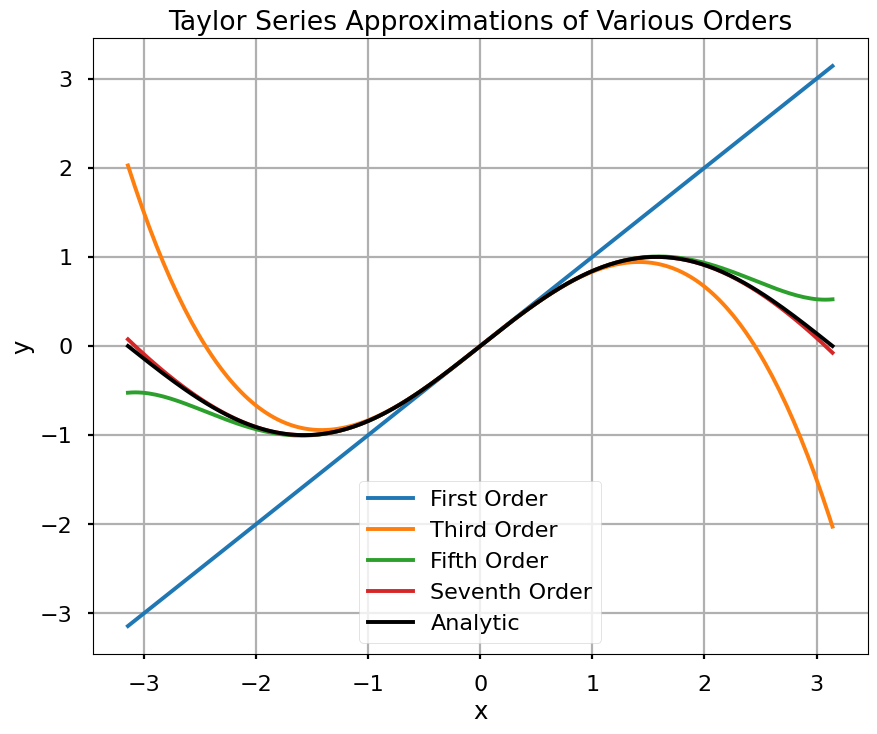

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-poster')

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize=(10,8))
for n, label in zip(range(4), labels):
      y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
      plt.plot(x, y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In the graph above we can see that higher orders begin to approve the analytic function.

**Example**  Compute the seventh order Taylor Series approximation for sin(x) around a = 0 at x = π/2. Compare the value to the correct value of 1.

In [ ]:
x = np.pi/2
y = 0

for n in range(4):
      y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)

print(y)

0.9998431013994987


<ipython-input-11-e6cd7b36f1e5>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)


# 3.3 Unconstrained Optimization

Through the use of minimizers, we can find optimizing conditions to "unconstrained continuous functions". The goal is to find the global minimizers for the following optimization problem: min f(x) for x𝜖ℝᵈ.

Global minimizer: Let f: ℝᵈ → ℝ. The point x* ϵ ℝᵈ is a global minimizer of f over ℝᵈ if f(x) ≽ f(x*), ∀x ϵ ℝᵈ.

Local minimizer: Let f: ℝᵈ → ℝ. The point x* ϵ ℝᵈ is a local minimizer of f over ℝᵈ if there is δ>0 such that f(x) ≽ f(x*), ∀x ϵ Bδ(x*) \ {x*}.

If the inequality is strict then x* is a strict local minimizer.

The difference between a global minimizer and a local minimizer can be seen in the image below.

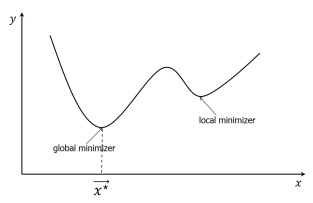.



Local minimizers are expressed in specifications of the gradient, as well as the Hessian of the function.

Descent direction: Let f: ℝᵈ → ℝ. A vector v is a descent direction for f at x0 if there is α* > 0 such that f(x0 + αv) < f(x0), ∀α ϵ (0, α*).

To find a local minimimum of a differentiable function we can use an iterative optimization algorithm, known as the gradient descent. Once it has been established that a function has a minimizer, we can use the gradient descent method to solve optimization problems.

Instead of looking at a large number of x-values to find the minimum, we instead look at all locations of x where ∇f(x) = 0. From those specified x-values, we will then choose the x-value which creates the smallest output.

This method of finding stationary points is useful in many problems, but it can also create systems of nonlinear equations which do not lead to explicit solutions. From here we must use gradient descent methods.

**Gradient Descent**

Through the use of machine learning, gradient descent will go through an iterative process to update the given parameters for optimization. The optimization algorithm uses the directionality of the gradient to determine the updates for the parameters. If the gradient is negative the parameters will be updated opposite to the gradient, this gives the optimal parameters for the minimum of the function.

**Example**  Use the gradient descent algorithm to solve a linear regression problem.

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data
np.random.seed(0)
x = 5 * np.random.rand(100,1)
y = 2 + 3 * x + np.random.randn(100,1)

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (100, 1)
Shape of y:  (100, 1)


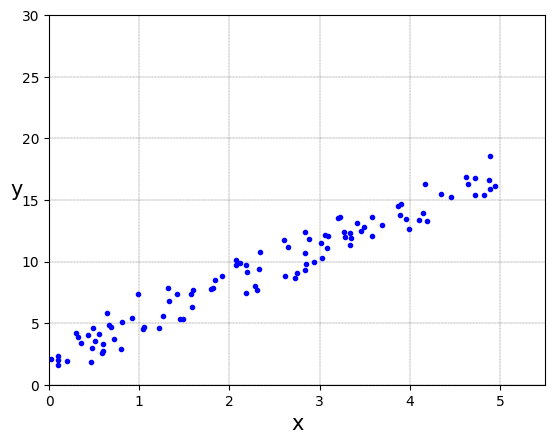

In [8]:
plt.plot(x, y, 'b.')
plt.xlabel("x", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
_ = plt.axis([0,5.5,0,30])

In [9]:
# Add a column of ones
add_ones = np.ones((len(x), 1))
x_data = np.hstack((add_ones, x))
print("Shape of x_data: ", x_data.shape)

Shape of x_data:  (100, 2)


In [10]:
def GradientDescent(X,y,theta,lr=0.01,n_iters=100):
    m = len(y)
    costs = []
    for _ in range(n_iters):
        y_hat = np.dot(X,theta)
        theta = theta -(1/m) * lr * (np.dot(X.T,(y_hat - y)))
        cost = (1/2*m) * np.sum(np.square(y_hat-y))
        costs.append(cost)
    return theta, costs

In [11]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.cost = np.zeros(self.n_iters)

    def train(self, x, y):
        self.theta =np.random.randn(x.shape[1],1)
        thetas,costs=GradientDescent(x,y,self.theta,self.lr,self.n_iters)
        self.theta=thetas
        self.cost=costs
        return self
    def predict(self, x):
        return np.dot(x, self.theta)

Thetas: [[2.13115793]
 [3.01637887]]


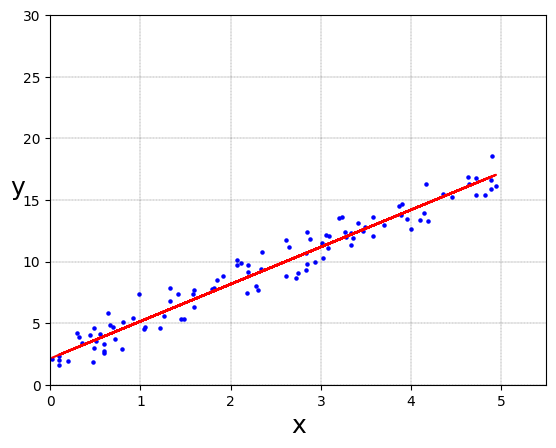

In [12]:
# Initialize the model
model = LinearRegression(lr=0.01, n_iters=1000)

# Train the data
model.train(x_data, y)

# printing thetas values
print('Thetas:' ,model.theta)

# Predict
y_predicted = model.predict(x_data)

# Plot original data points
plt.scatter(x, y, s=5,color='b')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

# Draw predicted line
plt.plot(x, y_predicted, color='r')
_ =plt.axis([0,5.5,0,30])
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

References for gradient descent code:
* Andrew NG, “CS229 Lecture notes”, https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf
* Andrew Ng et.al, “Linear Regression”, http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/